In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image 
import os
import random
import cv2

import tensorflow as tf
import keras 
from sklearn.model_selection import train_test_split 
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Flatten, BatchNormalization, GlobalAveragePooling2D, MaxPool2D

In [ ]:
#read_file = pd.read_excel(r'C:\Users\anndz\Desktop\BP\COVID.metadata.xlsx')
#read_file.to_csv(r'C:\Users\anndz\Desktop\BP\COVID.metadata.csv', index = None, header=True)
#COVID = read_file

Predspracovanie

In [2]:
Ycat = []
Ybin = []
#labels = ['Normal', 'Lung_Opacity','Viral Pneumonia','Tuberculosis']
labels = ['Normal', 'Lung_Opacity','Viral_Pneumonia','Tuberculosis','COVID']
size = 256

def get_data(folder, Ycat, Ybin):
    x = 0
    data = []
    for label in labels: 
        path = os.path.join(folder, label)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(folder,label, images))[...,::-1]
            img = cv2.resize(img, (size, size))
            img = img.astype('float16')
            img /= 255
            data.append(img)
            Ycat.append(label)
            if label == 'COVID':
                Ybin.append(1)
            else:
                Ybin.append(0)
        x = x + 1
    return data

In [3]:
Xdata = get_data('',Ycat, Ybin)

In [ ]:
plt.imshow(Xdata[1], cmap='gray')
print(Ycat[1],Ybin[1])

In [ ]:
print(Ycat[2], Ybin[2])

In [4]:
#Xdata = Xdata.sample(n=len(Xdata), random_state=1242)
#Ycat = Ycat.sample(n=len(Ycat), random_state=1242)
random.seed(151)
Xdata = random.sample(Xdata,3600)
random.seed(151)
Ycat=random.sample(Ycat,3600)
random.seed(151)
Ybin=random.sample(Ybin,3600)
X = np.array(Xdata)
Ycat = np.array(Ycat)
Ybin = np.array(Ybin)

In [ ]:
print(Ybin)

In [ ]:
#Ycat = utils.to_categorical(labels,5)

Binary

In [5]:
xBin_train, xBin_test, yBin_train, yBin_test = train_test_split(X, Ybin, test_size=0.3, random_state=1)

In [17]:
print(len(xBin_test),len(yBin_test))

1080 1080


In [8]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)      

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam()
#model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])

In [14]:
history = model.fit(xBin_train, yBin_train, epochs=5, batch_size=10, validation_data=(xBin_test, yBin_test))

Epoch 1/5
252/252 [==============================] - 180s 712ms/step - loss: 0.3981 - accuracy: 0.8298 - val_loss: 0.2987 - val_accuracy: 0.8574
Epoch 2/5
252/252 [==============================] - 175s 694ms/step - loss: 0.3283 - accuracy: 0.8480 - val_loss: 0.3308 - val_accuracy: 0.8731
Epoch 3/5
252/252 [==============================] - 173s 685ms/step - loss: 0.2739 - accuracy: 0.8782 - val_loss: 0.2466 - val_accuracy: 0.8954
Epoch 4/5
252/252 [==============================] - 177s 701ms/step - loss: 0.2197 - accuracy: 0.9095 - val_loss: 0.1980 - val_accuracy: 0.9148
Epoch 5/5
252/252 [==============================] - 183s 727ms/step - loss: 0.1816 - accuracy: 0.9337 - val_loss: 0.2116 - val_accuracy: 0.9176


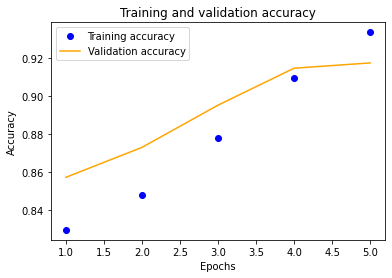

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(xBin_test), 1)
#predictions = model.predict(xBin_test)
#predictions = predictions.reshape(1,-1)[0]

In [22]:
print(xBin_test.shape, predictions.shape)

(1080, 256, 256, 3) (1080,)


In [23]:
print(classification_report(yBin_test, predictions, target_names = ['Non-COVID (Class 0)','COVID (Class 1)']))

                     precision    recall  f1-score   support

Non-COVID (Class 0)       0.97      0.93      0.95       904
    COVID (Class 1)       0.71      0.83      0.77       176

           accuracy                           0.92      1080
          macro avg       0.84      0.88      0.86      1080
       weighted avg       0.92      0.92      0.92      1080



In [25]:
print('Confusion matrix : \n')
print(confusion_matrix(yBin_test, predictions)) #(actual, predicted)

Confusion matrix : 

[[845  59]
 [ 30 146]]


Categorical

In [ ]:
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2))),

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

model.summary()

In [ ]:
adam = Adam()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=adam, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
f = model.fit(x_train, y_train, epochs = 3,batch_size=128, validation_data=(x_test, y_test))

In [ ]:
acc = f.history['accuracy']
val_acc = f.history['val_accuracy']
loss = f.history['loss']
val_loss = f.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(x_test.shape,y_test.shape)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predicted = np.argmax(predictions, axis = 1)

In [ ]:
predicted

In [ ]:
results={
   0:'Normal',
   1:'Lung_Opacity',
   2:'Viral_Pneumonia',
   3:'Tuberculosis',
   4:'COVID',
}

In [ ]:
#print(pd.crosstab(y_test, predicted))
print(pd.crosstab(y_test, predicted))

In [ ]:
print(classification_report(y_test, predicted))#,labels = labels, target_names = ['Normal', 'Lung_Opacity','Viral_Pneumonia','Tuberculosis','COVID']))